Summary of findings from WeatherPy
1.) It appears that cloudiness is typically reported in intervals of 20 (e.g. 20%, 40%, etc.) which may limit our ability to draw concise conclusions on how latitude impacts cloudiness.
2.) As one would expect, temperatures rise as one gets closer to the equator. 
3.) The majority of cities in the world fall between -60 degrees and 80 degrees latitude.

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [24]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

## Perform API Calls

In [25]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q="

In [26]:
# create lists to hold reponse info
city = []
lat = []
lon = []
temp = []
wind = []
cloud = []
humidity = []
count = []

In [27]:
# Build a loop to create URL for each city in my list
# Need to add a 'for x'

for count, city in enumerate(cities, 1):
    try:
        response = requests.get(url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
    except KeyError:
        len(cities)
    print(f"Processing row {count} for {city}.")
    print("------------------------------------")

Processing row 1 for sulangan.
------------------------------------
Processing row 2 for puerto ayora.
------------------------------------
Processing row 3 for inyonga.
------------------------------------
Processing row 4 for tuktoyaktuk.
------------------------------------
Processing row 5 for ponta delgada.
------------------------------------
Processing row 6 for albany.
------------------------------------
Processing row 7 for upernavik.
------------------------------------
Processing row 8 for klaksvik.
------------------------------------
Processing row 9 for rikitea.
------------------------------------
Processing row 10 for victoria.
------------------------------------
Processing row 11 for massakory.
------------------------------------
Processing row 12 for sihlea.
------------------------------------
Processing row 13 for ushuaia.
------------------------------------
Processing row 14 for dikson.
------------------------------------
Processing row 15 for kahului.
-------

Processing row 120 for castro.
------------------------------------
Processing row 121 for tura.
------------------------------------
Processing row 122 for yar-sale.
------------------------------------
Processing row 123 for kodiak.
------------------------------------
Processing row 124 for souillac.
------------------------------------
Processing row 125 for meulaboh.
------------------------------------
Processing row 126 for pointe-noire.
------------------------------------
Processing row 127 for qaanaaq.
------------------------------------
Processing row 128 for ous.
------------------------------------
Processing row 129 for college.
------------------------------------
Processing row 130 for hithadhoo.
------------------------------------
Processing row 131 for chengmai.
------------------------------------
Processing row 132 for terney.
------------------------------------
Processing row 133 for noumea.
------------------------------------
Processing row 134 for miloslavsko

Processing row 237 for banamba.
------------------------------------
Processing row 238 for maragua.
------------------------------------
Processing row 239 for malwan.
------------------------------------
Processing row 240 for nikolskoye.
------------------------------------
Processing row 241 for sur.
------------------------------------
Processing row 242 for ondarroa.
------------------------------------
Processing row 243 for qianan.
------------------------------------
Processing row 244 for vydrino.
------------------------------------
Processing row 245 for san cristobal.
------------------------------------
Processing row 246 for tuatapere.
------------------------------------
Processing row 247 for quatre cocos.
------------------------------------
Processing row 248 for broome.
------------------------------------
Processing row 249 for belaya gora.
------------------------------------
Processing row 250 for half moon bay.
------------------------------------
Processing row

Processing row 353 for changji.
------------------------------------
Processing row 354 for sawtell.
------------------------------------
Processing row 355 for yambio.
------------------------------------
Processing row 356 for dembi dolo.
------------------------------------
Processing row 357 for zonguldak.
------------------------------------
Processing row 358 for vao.
------------------------------------
Processing row 359 for stornoway.
------------------------------------
Processing row 360 for tagusao.
------------------------------------
Processing row 361 for kalmunai.
------------------------------------
Processing row 362 for samusu.
------------------------------------
Processing row 363 for hami.
------------------------------------
Processing row 364 for artyom.
------------------------------------
Processing row 365 for ostrovnoy.
------------------------------------
Processing row 366 for zaoyang.
------------------------------------
Processing row 367 for nisia flore

Processing row 470 for safford.
------------------------------------
Processing row 471 for chuy.
------------------------------------
Processing row 472 for luce.
------------------------------------
Processing row 473 for bubaque.
------------------------------------
Processing row 474 for rawannawi.
------------------------------------
Processing row 475 for griffith.
------------------------------------
Processing row 476 for faya.
------------------------------------
Processing row 477 for gedo.
------------------------------------
Processing row 478 for rocha.
------------------------------------
Processing row 479 for cayenne.
------------------------------------
Processing row 480 for olafsvik.
------------------------------------
Processing row 481 for namibe.
------------------------------------
Processing row 482 for mindelo.
------------------------------------
Processing row 483 for lolua.
------------------------------------
Processing row 484 for kosh-agach.
------------

Processing row 588 for dwarka.
------------------------------------
Processing row 589 for alenquer.
------------------------------------
Processing row 590 for verkhnyaya inta.
------------------------------------
Processing row 591 for santa rosa.
------------------------------------
Processing row 592 for yulara.
------------------------------------
Processing row 593 for mwene-ditu.
------------------------------------
Processing row 594 for werda.
------------------------------------
Processing row 595 for yunjinghong.
------------------------------------
Processing row 596 for gasa.
------------------------------------
Processing row 597 for progreso.
------------------------------------
Processing row 598 for alihe.
------------------------------------
Processing row 599 for saint-georges.
------------------------------------
Processing row 600 for acapulco.
------------------------------------
Processing row 601 for cockburn town.
------------------------------------
Processing

In [31]:
# Create a dataframe to hold all weather stats for each city
weather_df = {
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "cloudiness": cloud,
    "wind speed": wind,
    "humidity": humidity
}
weather_df = pd.DataFrame(weather_df)
weather_df.head()

,lat,lon,temp,cloudiness,wind speed,humidity
0,11.14,123.72,83.92,64,17.81,99
1,-0.74,-90.35,78.80,40,19.46,65
2,-6.72,32.06,78.43,44,9.42,27
3,69.44,-133.03,32.00,90,21.92,100
4,37.73,-25.67,73.40,20,2.24,94


In [43]:
weather_df.to_excel("Resources/weather_by_latitude.xlsx", index=False)

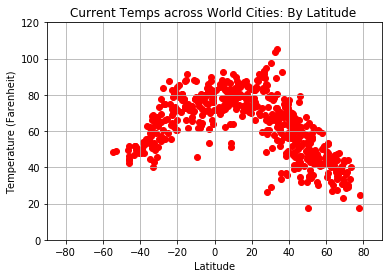

<Figure size 432x288 with 0 Axes>

In [35]:
plt.scatter(weather_df["lat"], weather_df["temp"], color='r', marker="o")
plt.title("Current Temps across World Cities: By Latitude ")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.ylim(0,120)
plt.xlim(-90,90)
plt.grid(True)
plt.show()
plt.savefig("TempsbyLatitude.png")

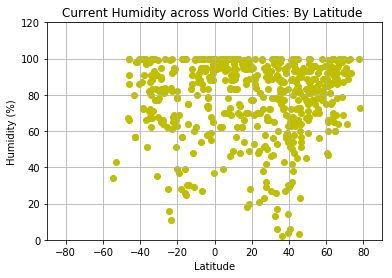

<Figure size 432x288 with 0 Axes>

In [44]:
plt.scatter(weather_df["lat"], weather_df["humidity"], color='y', marker="o")
plt.title("Current Humidity across World Cities: By Latitude ")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.ylim(0,120)
plt.xlim(-90,90)
plt.grid(True)
plt.show()
plt.savefig("Resources/HumiditybyLatitude.png")

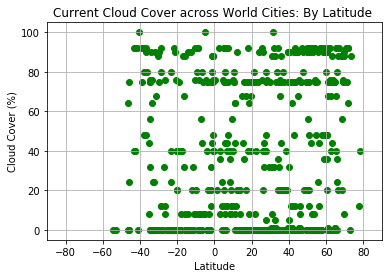

<Figure size 432x288 with 0 Axes>

In [38]:
plt.scatter(weather_df["lat"], weather_df["cloudiness"], color='g', marker="o")
plt.title("Current Cloud Cover across World Cities: By Latitude ")
plt.ylabel("Cloud Cover (%)")
plt.xlabel("Latitude")
plt.xlim(-90,90)
plt.grid(True)
plt.show()
plt.savefig("Resources/HumiditybyLatitude.png")

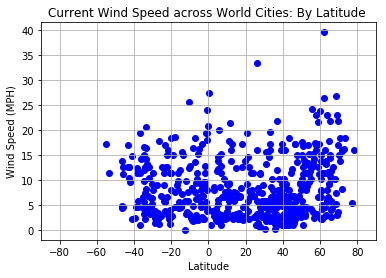

<Figure size 432x288 with 0 Axes>

In [40]:
plt.scatter(weather_df["lat"], weather_df["wind speed"], color='b', marker="o")
plt.title("Current Wind Speed across World Cities: By Latitude ")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.xlim(-90,90)
plt.grid(True)
plt.show()
plt.savefig("Resources/WindSpeedbyLatitude.png")